# PROJECT - CIFAR_10

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

Firstly I improt all the library for using the data and working on the project.

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import ensemble
from sklearn.metrics import classification_report , confusion_matrix
import numpy as np
import pandas as pd
import cifar10
import matplotlib.pyplot as plt

Now , Give the data for upload the data and using it.

In [3]:
cifar10.data_path = "data/CIFAR-10/"

Here we download the all the data and extract the file for finding all the classes and label .

In [4]:
cifar10.maybe_download_and_extract()

- Download progress: 100.0%
Download finished. Extracting files.
Done.


Now , finding the all the classes Name.

In [6]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Now the time for getting the test and train data of the all images , class , labels.

In [7]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [8]:
print("images_train = " , images_train.shape)
print("cls_train = " , images_train.shape)
print("labels_train = " , images_train.shape)

images_train =  (50000, 32, 32, 3)
cls_train =  (50000, 32, 32, 3)
labels_train =  (50000, 32, 32, 3)


Here , correct the dimension and print the shapes of train_image.

In [9]:
x_images_training=images_train[:, :, :, 0]
x_train=x_images_training.reshape((50000, 32*32))
y_train=cls_train
print(x_train.shape)
print(y_train.shape)
print(x_images_training.shape)

(50000, 1024)
(50000,)
(50000, 32, 32)


In [10]:
x_train.max()

1.0

Now , Plot all the images with the figue_size = 8*8.

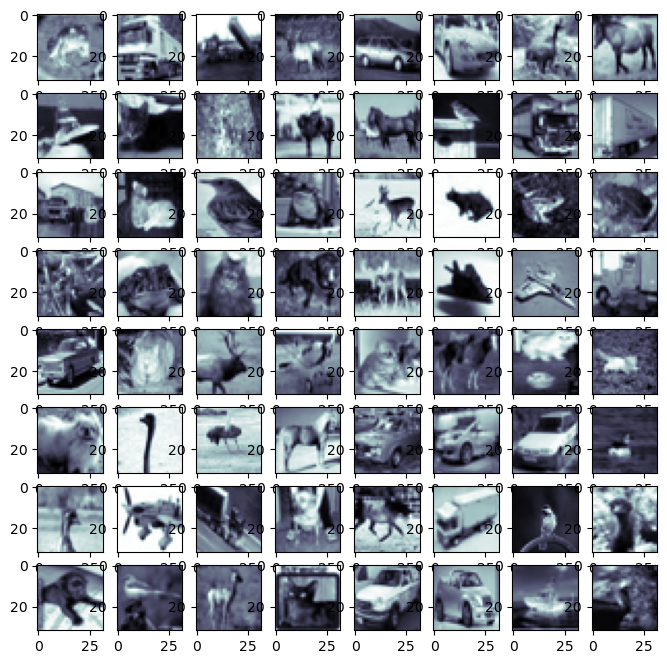

In [11]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_images_training[i] , cmap = plt.cm.bone)
plt.show()

Using for the PCA by dimension reduction and better accuracy.

In [12]:
pca = PCA()
pca.fit(x_train)

PCA()

Now, Calculate the dimension_n_component because size of all data is very large then you find for better accuracy so calculate k

In [13]:
k = 0
total = sum(pca.explained_variance_)
currsum =0
while currsum/total <0.99:
    currsum += pca.explained_variance_[k]
    k=k+1
k

429

And , use the k in n_component and fit the data of the cifar_10.

In [15]:
pca_cifar =PCA(n_components = k ,whiten = True)
x_train_transformed = pca_cifar.fit_transform(x_train)

In [16]:
x_train_transformed.shape

(50000, 429)

In [18]:
print(images_test.shape)
print(cls_test.shape)
print(labels_test.shape)

(10000, 32, 32, 3)
(10000,)
(10000, 10)


Now , here reshape the data of the test data and print the shape of the test data.

In [21]:
x_images_test=images_test[:, :, :, 0]
x_test=x_images_test.reshape((10000, 32*32))
y_test=cls_train
print(x_test.shape)
print(y_test.shape)
print(x_images_test.shape)

(10000, 1024)
(50000,)
(10000, 32, 32)


In [22]:
x_test_transformed = pca_cifar.fit_transform(x_test)

In [23]:
x_test_transformed.shape

(10000, 429)

In [25]:
x_test.max()

1.0

Here we apply SVC,RF,LR,KN,GNB for all the calculate the prediction and use library.

In [26]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

NOw , here applythe SVC.

In [27]:
SVC()

SVC()

Now , calculate the all four classifier clf1,clf2,clf3,clf4 and use them.

In [28]:
clf1=RandomForestClassifier(n_estimators=429, n_jobs=-1, max_depth=2000, max_leaf_nodes=2350)
clf2=LogisticRegression(n_jobs=-1, multi_class="auto")
clf3=KNeighborsClassifier(n_jobs=-1)
clf4=SVC(tol=0.0001)
print("Done")

Done


And, all the four classifier fit the data with the help of x_train_transformed,y_train . all train data fit the model.

In [29]:
clf1.fit(x_train_transformed,y_train)
print("Done")
clf2.fit(x_train_transformed,y_train)
print("Done")
clf3.fit(x_train_transformed,y_train)
print("Done")
clf4.fit(x_train_transformed,y_train)
print("Done")

Done
Done
Done
Done


and predict the y_test of all classfier using with x_test_transformed.

In [31]:
y_test_predict1 = clf1.predict(x_test_transformed)
y_test_predict2 = clf2.predict(x_test_transformed)
y_test_predict3 = clf3.predict(x_test_transformed)
y_test_predict4 = clf4.predict(x_test_transformed)

HERE, we calculate the all the prediction and store in ans.

In [33]:
dic=dict()
ans=[]
for i in range(len(class_names)):
    dic[i]=class_names[i]
for i in range(len(y_test_predict1)):
    arr=np.array([y_test_predict1[i], y_test_predict2[i], y_test_predict3[i], y_test_predict4[i]])
    ans.append(dic[np.argmax(np.bincount(arr))])

Now , make the csv file for storing all the ans in a csv file.

In [34]:
np.savetxt(fname="output_data.csv", X=ans, delimiter=',', fmt="%s")